In [3]:
import pandas as pd

# Path to the downloaded CSV file
data_path = r"C:\Users\ENG WAHEED\Downloads\Confirmed Positive Cases of COVID-19 in Ontario.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
print(df.head())

   Row_ID Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
0       1            1934-09-28         2022-09-29         2022-09-29   
1       2            1989-02-21         2022-11-08         2022-11-07   
2       3            2000-03-01         2022-01-30                NaN   
3       4            2002-07-06         2022-07-06         2022-07-07   
4       5            2002-08-08         2022-08-15         2022-08-15   

  Specimen_Date Age_Group Client_Gender Outcome1  Reporting_PHU_ID  \
0    2022-09-27       <20        FEMALE      NaN              2262   
1    2022-11-06       <20        FEMALE      NaN              2270   
2    2000-03-01       <20        FEMALE      NaN              2243   
3    2002-07-06       20s        FEMALE      NaN              2270   
4    2022-08-14       60s          MALE      NaN              2233   

                                      Reporting_PHU  Reporting_PHU_Address  \
0                  Thunder Bay District Health Unit    999 Bal

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717434 entries, 0 to 1717433
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Row_ID                     int64  
 1   Accurate_Episode_Date      object 
 2   Case_Reported_Date         object 
 3   Test_Reported_Date         object 
 4   Specimen_Date              object 
 5   Age_Group                  object 
 6   Client_Gender              object 
 7   Outcome1                   object 
 8   Reporting_PHU_ID           int64  
 9   Reporting_PHU              object 
 10  Reporting_PHU_Address      object 
 11  Reporting_PHU_City         object 
 12  Reporting_PHU_Postal_Code  object 
 13  Reporting_PHU_Website      object 
 14  Reporting_PHU_Latitude     float64
 15  Reporting_PHU_Longitude    float64
dtypes: float64(2), int64(2), object(12)
memory usage: 209.6+ MB
None


In [5]:
# Display summary statistics of the dataset
print(df.describe())

             Row_ID  Reporting_PHU_ID  Reporting_PHU_Latitude  \
count  1.717434e+06      1.717434e+06            1.717434e+06   
mean   8.587175e+05      2.685810e+03            4.396700e+01   
std    4.957806e+05      7.631429e+02            1.153449e+00   
min    1.000000e+00      2.226000e+03            4.230880e+01   
25%    4.293592e+05      2.244000e+03            4.346288e+01   
50%    8.587175e+05      2.257000e+03            4.365659e+01   
75%    1.288076e+06      3.895000e+03            4.404802e+01   
max    1.717434e+06      5.183000e+03            4.976961e+01   

       Reporting_PHU_Longitude  
count             1.717434e+06  
mean             -7.973390e+01  
std               2.396228e+00  
min              -9.448825e+01  
25%              -7.987134e+01  
50%              -7.948024e+01  
75%              -7.937936e+01  
max              -7.473630e+01  


In [6]:
# Check for missing values
print(df.isnull().sum())

Row_ID                             0
Accurate_Episode_Date              0
Case_Reported_Date                 0
Test_Reported_Date             53492
Specimen_Date                  12133
Age_Group                          0
Client_Gender                      0
Outcome1                     1698807
Reporting_PHU_ID                   0
Reporting_PHU                      0
Reporting_PHU_Address              0
Reporting_PHU_City                 0
Reporting_PHU_Postal_Code          0
Reporting_PHU_Website              0
Reporting_PHU_Latitude             0
Reporting_PHU_Longitude            0
dtype: int64


In [7]:
# Handle missing values drop the rows
df.dropna(subset=['Test_Reported_Date', 'Specimen_Date'], inplace=True)

# Fill missing Outcome1 with 'Unknown'
df['Outcome1'].fillna('Unknown', inplace=True)

In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
# reCheck the missing values
print(df.isnull().sum())

Row_ID                       0
Accurate_Episode_Date        0
Case_Reported_Date           0
Test_Reported_Date           0
Specimen_Date                0
Age_Group                    0
Client_Gender                0
Outcome1                     0
Reporting_PHU_ID             0
Reporting_PHU                0
Reporting_PHU_Address        0
Reporting_PHU_City           0
Reporting_PHU_Postal_Code    0
Reporting_PHU_Website        0
Reporting_PHU_Latitude       0
Reporting_PHU_Longitude      0
dtype: int64


In [10]:
# Convert date columns to datetime format
date_columns = ['Accurate_Episode_Date', 'Case_Reported_Date', 'Test_Reported_Date', 'Specimen_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [23]:
# Save cleaned data
cleaned_file = r"C:\Users\ENG WAHEED\Desktop\New folder\cleaned_COVID_19_dataset.csv"
df.to_csv('cleaned_file', index=False)


In [27]:
# Load the cleaned dataset
cleaned_file = r"C:\Users\ENG WAHEED\Desktop\New folder\cleaned_COVID_19_dataset.csv"
df = pd.read_csv('cleaned_file')

# Numerical summary statistics
numerical_summary = df.describe()

print("Numerical Summary:")
print(numerical_summary)

# Categorical summary statistics
categorical_summary = df.describe(include=['object', 'category'])

print("Categorical Summary:")
print(categorical_summary)

# Value counts for each categorical column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Numerical Summary:
             Row_ID  Reporting_PHU_ID  Reporting_PHU_Latitude  \
count  1.663776e+06      1.663776e+06            1.663776e+06   
mean   8.525337e+05      2.685823e+03            4.392814e+01   
std    4.939456e+05      7.635728e+02            1.076057e+00   
min    1.000000e+00      2.226000e+03            4.230880e+01   
25%    4.281038e+05      2.244000e+03            4.346288e+01   
50%    8.467535e+05      2.257000e+03            4.365659e+01   
75%    1.277580e+06      3.895000e+03            4.404802e+01   
max    1.717434e+06      5.183000e+03            4.976961e+01   

       Reporting_PHU_Longitude  
count             1.663776e+06  
mean             -7.967033e+01  
std               2.194109e+00  
min              -9.448825e+01  
25%              -7.987134e+01  
50%              -7.948024e+01  
75%              -7.937936e+01  
max              -7.473630e+01  
Categorical Summary:
       Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
count  

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

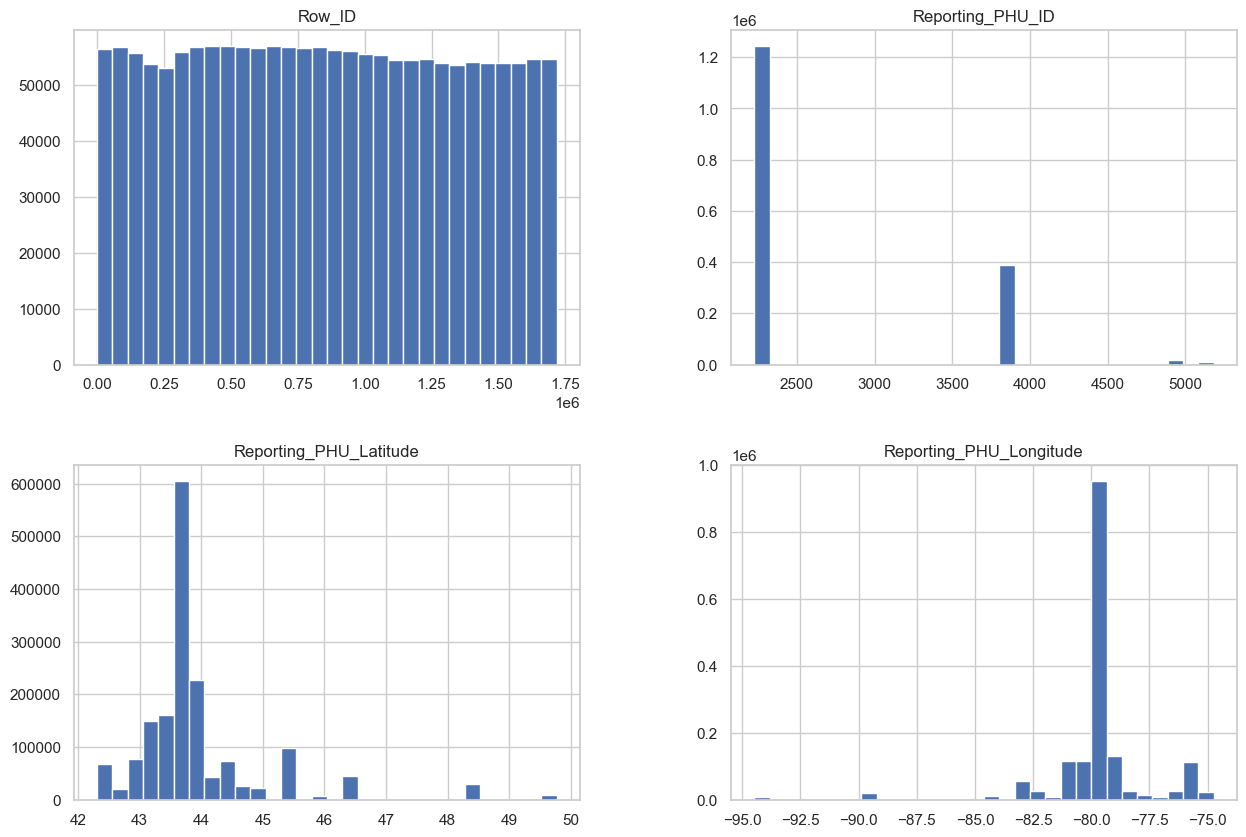

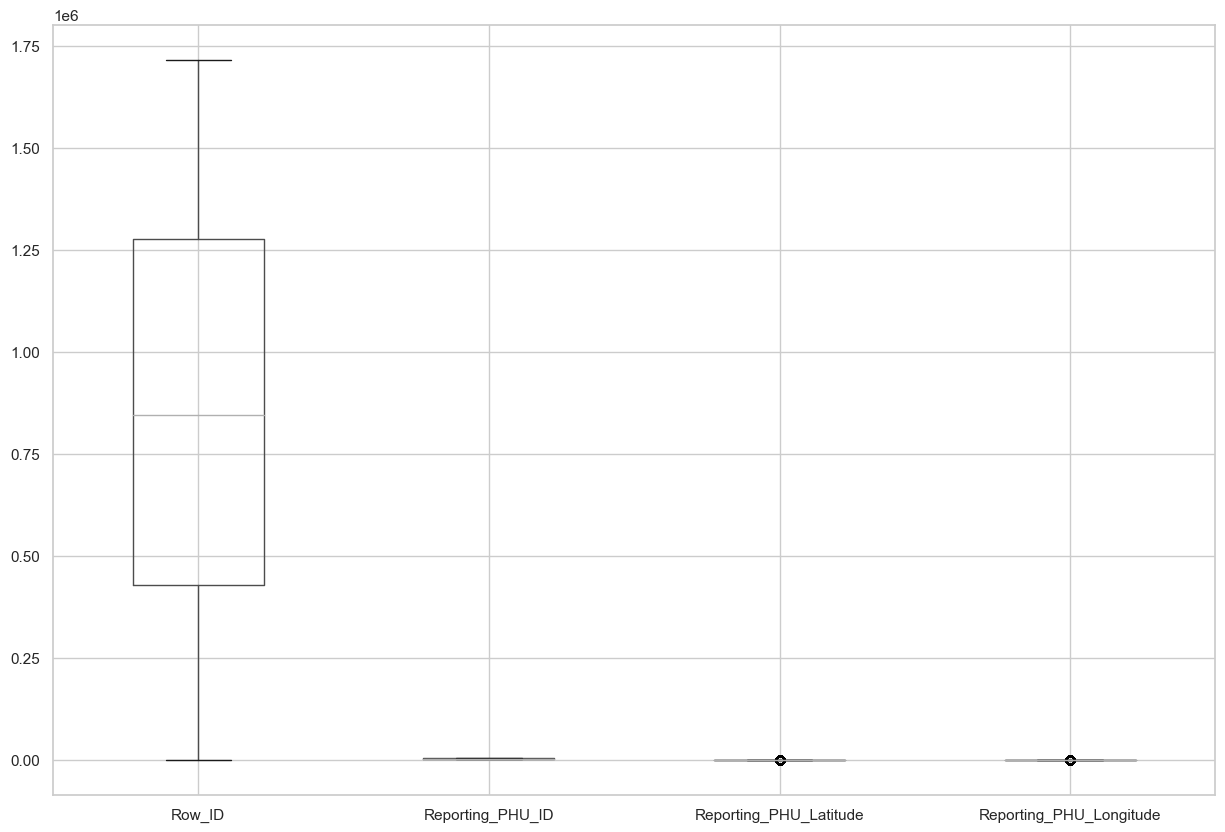

In [32]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

df.boxplot(figsize=(15, 10))
plt.show()

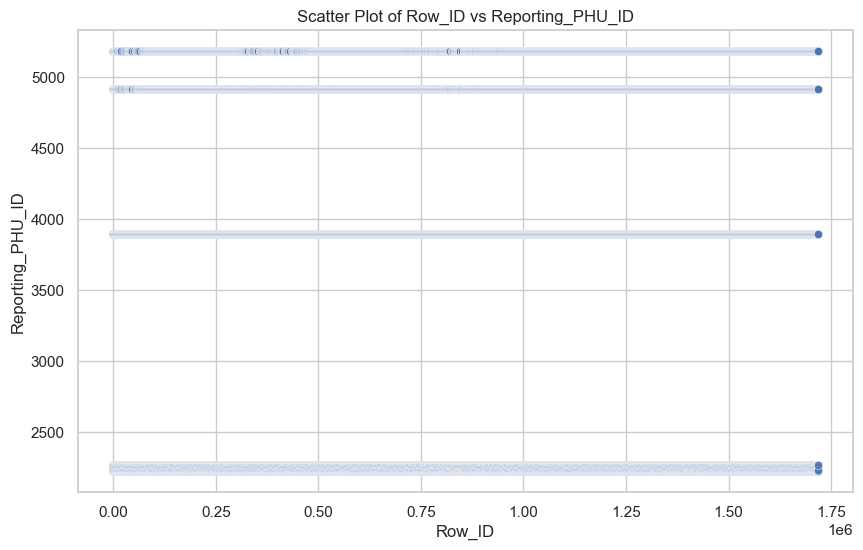

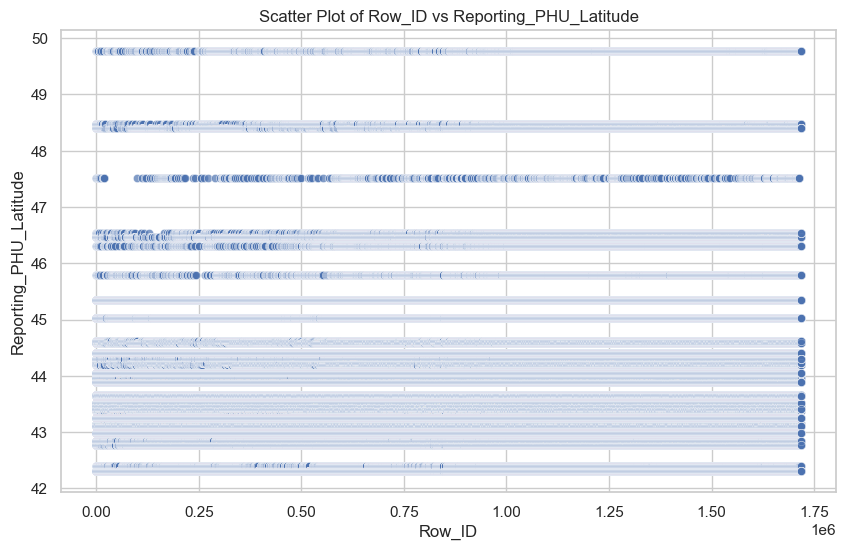

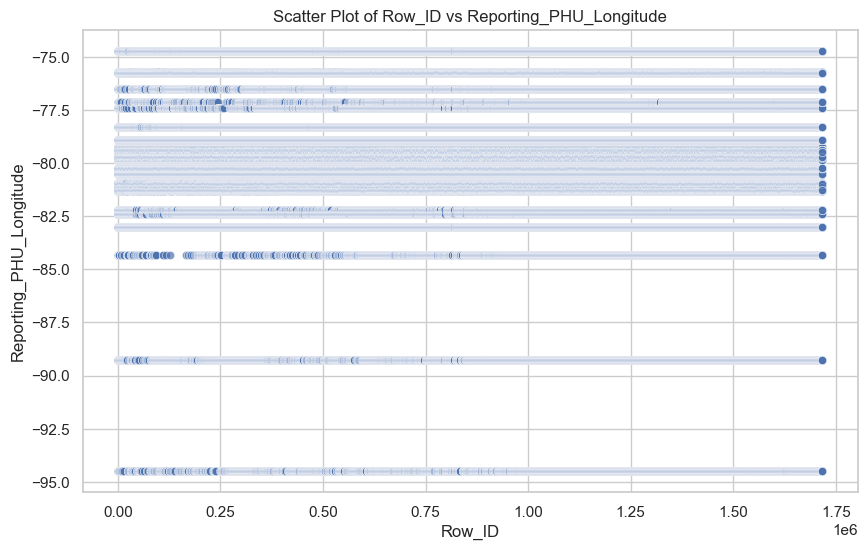

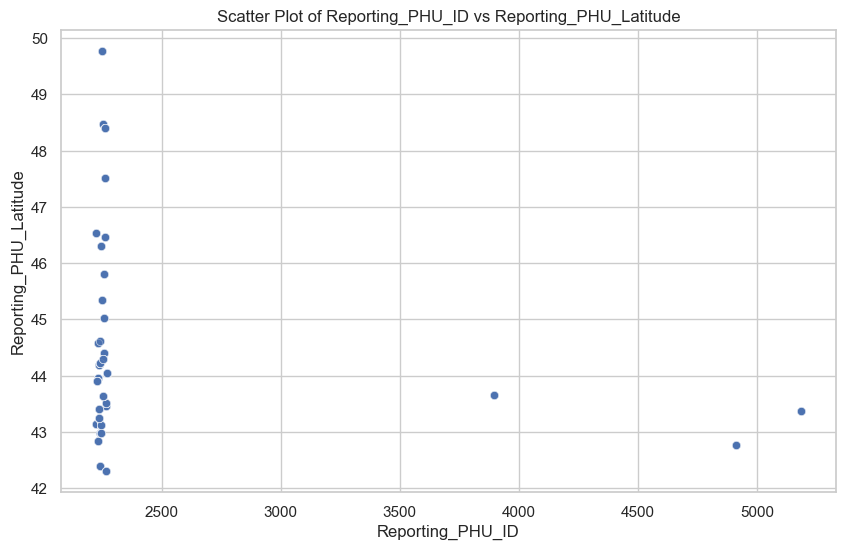

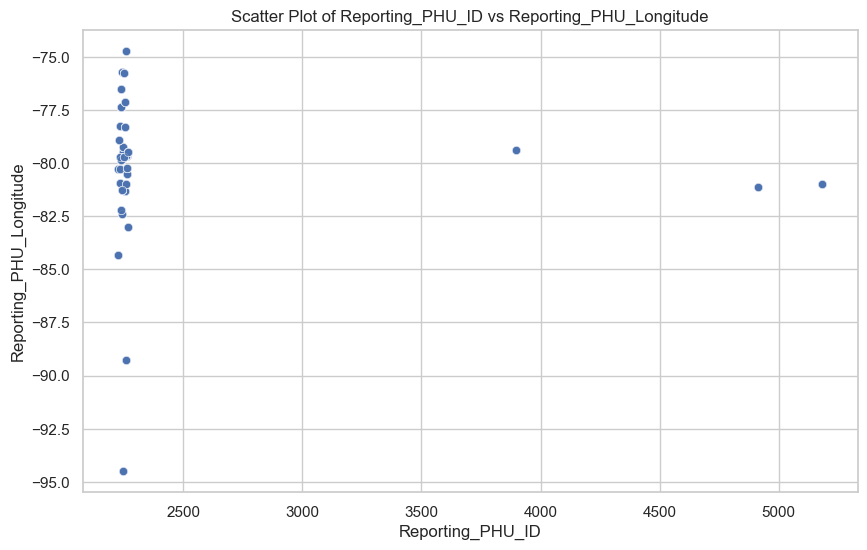

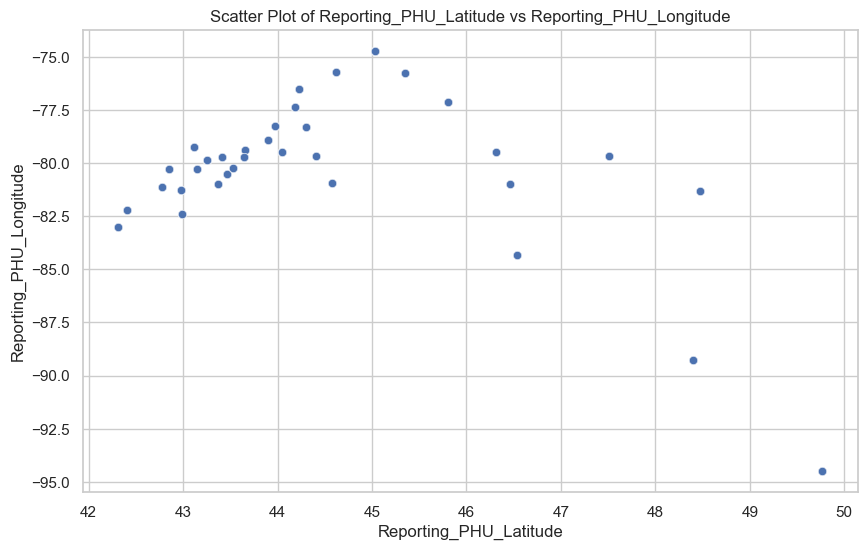

In [27]:
# Create scatter plots to explore relationships between numerical columns
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j], alpha=0.7)
        plt.title(f'Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

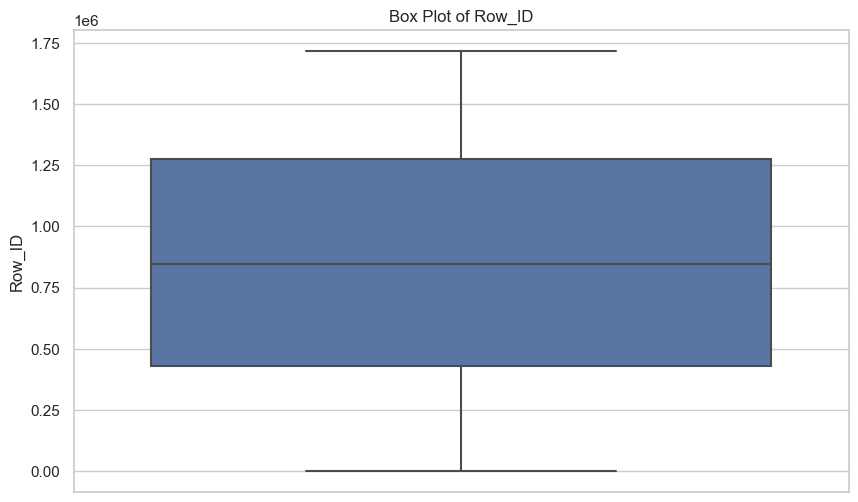

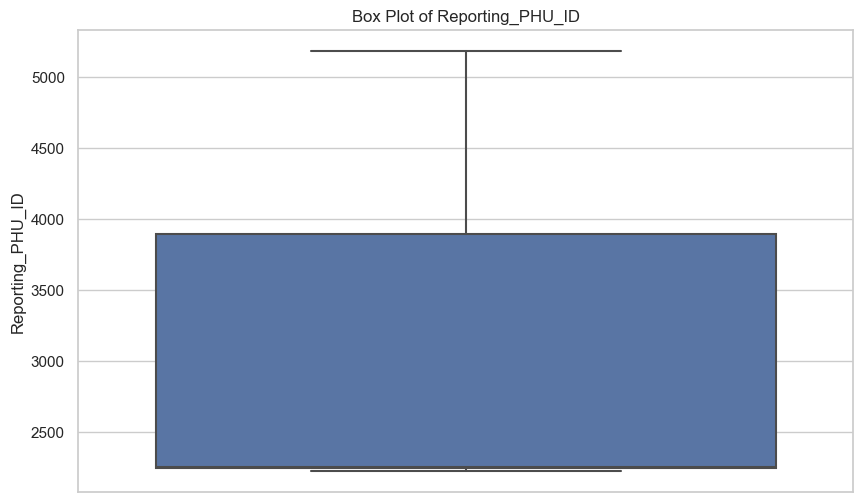

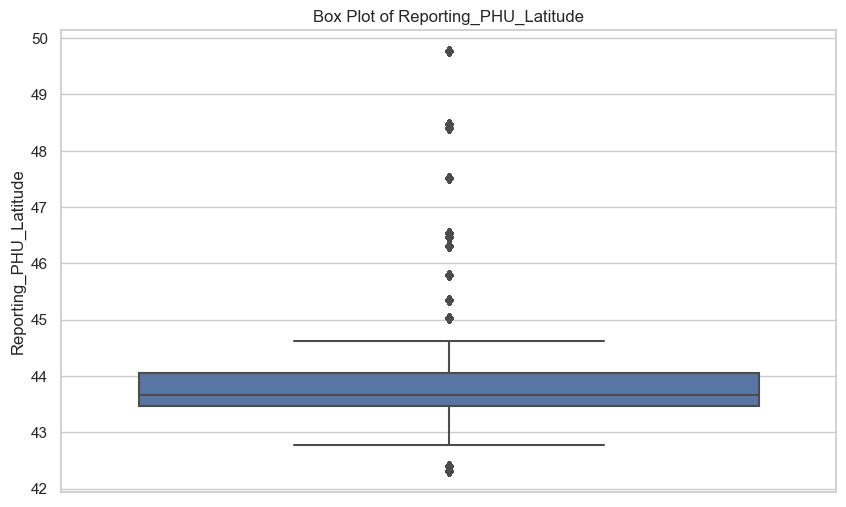

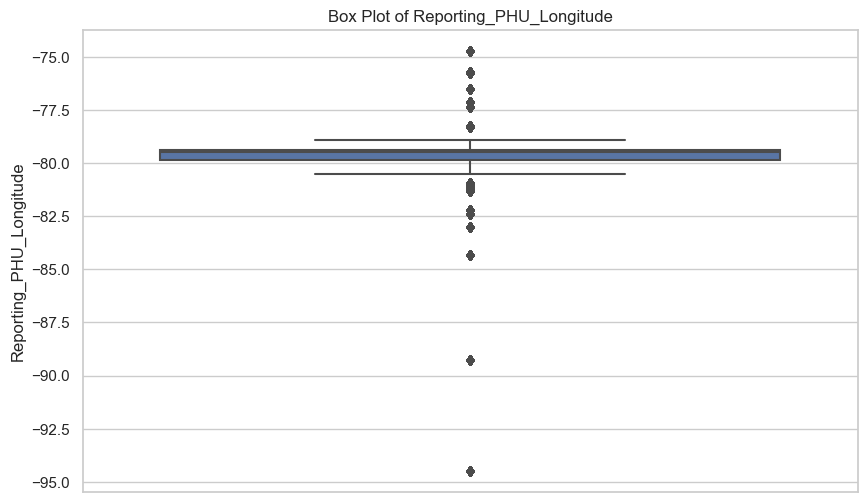

In [28]:
# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

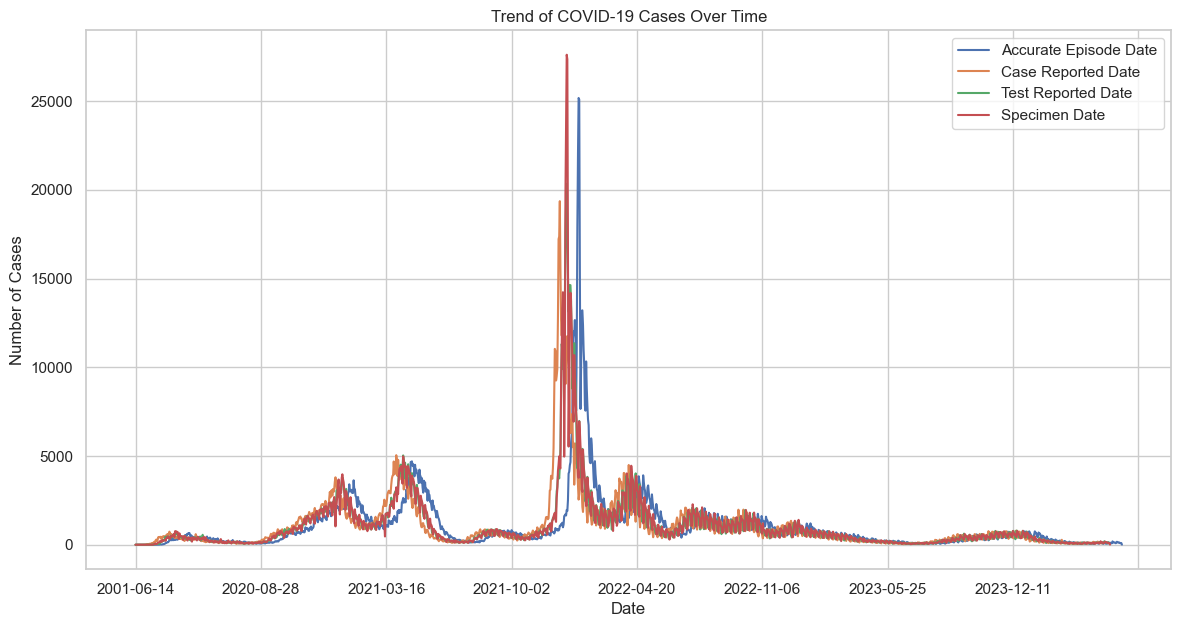

In [30]:
# Plot the number of cases over time for each of the date columns to observe trends
plt.figure(figsize=(14, 7))

df['Accurate_Episode_Date'].value_counts().sort_index().plot(kind='line', label='Accurate Episode Date')
df['Case_Reported_Date'].value_counts().sort_index().plot(kind='line', label='Case Reported Date')
df['Test_Reported_Date'].value_counts().sort_index().plot(kind='line', label='Test Reported Date')
df['Specimen_Date'].value_counts().sort_index().plot(kind='line', label='Specimen Date')

plt.title('Trend of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

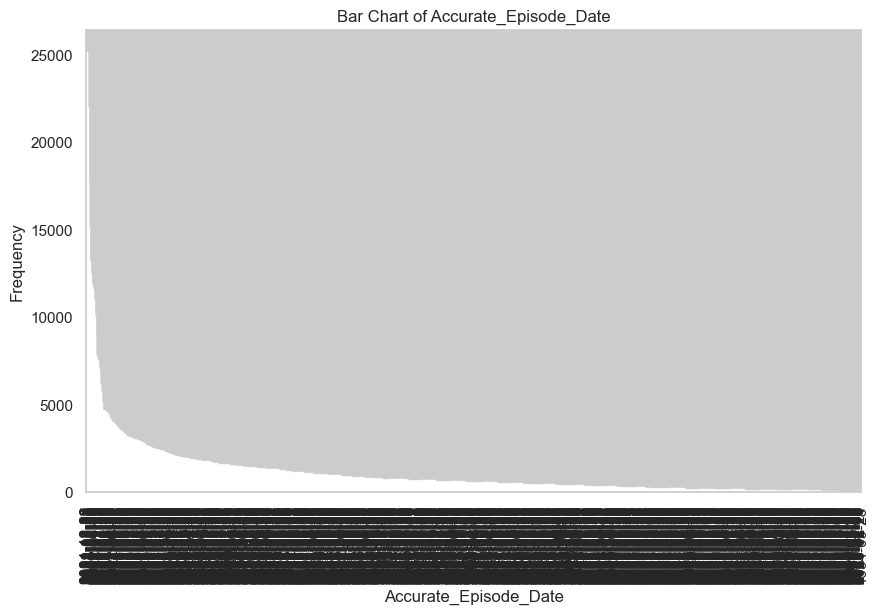

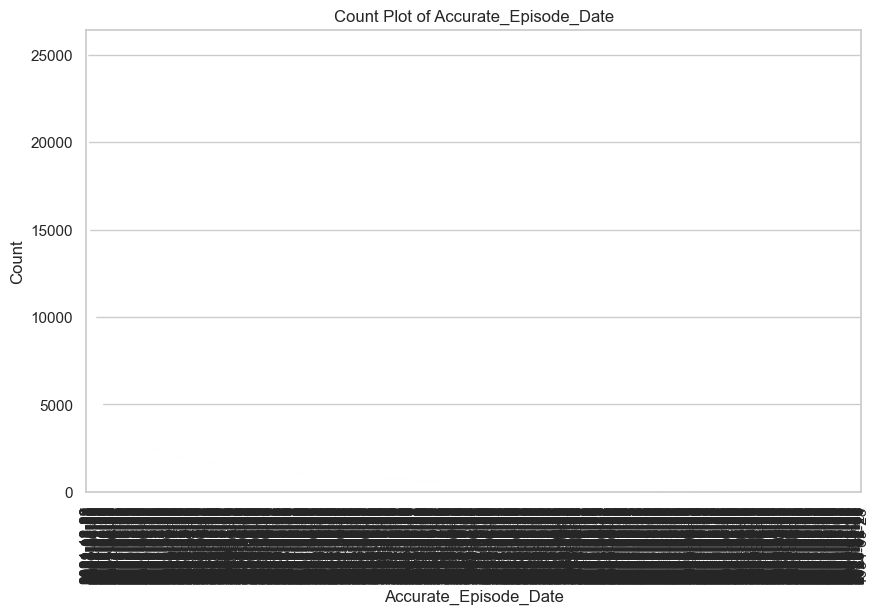

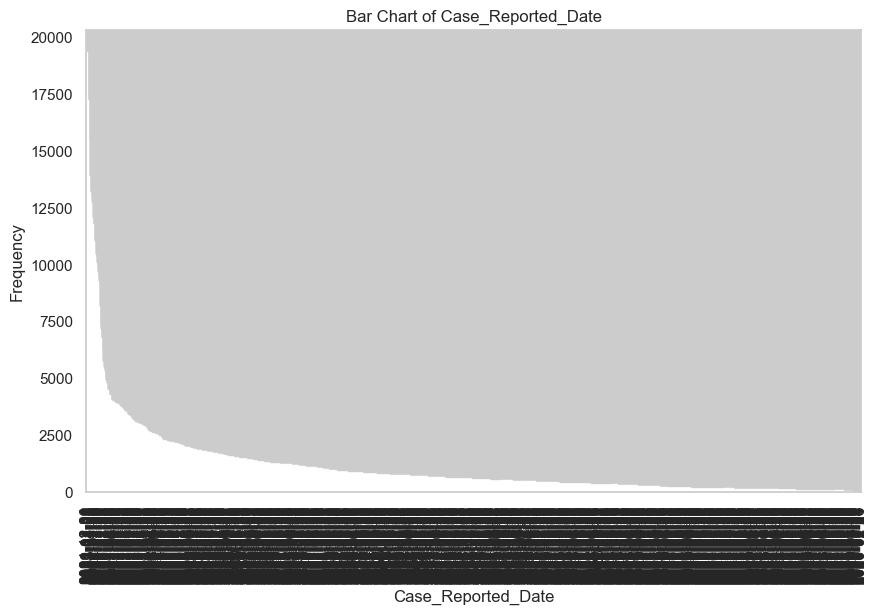

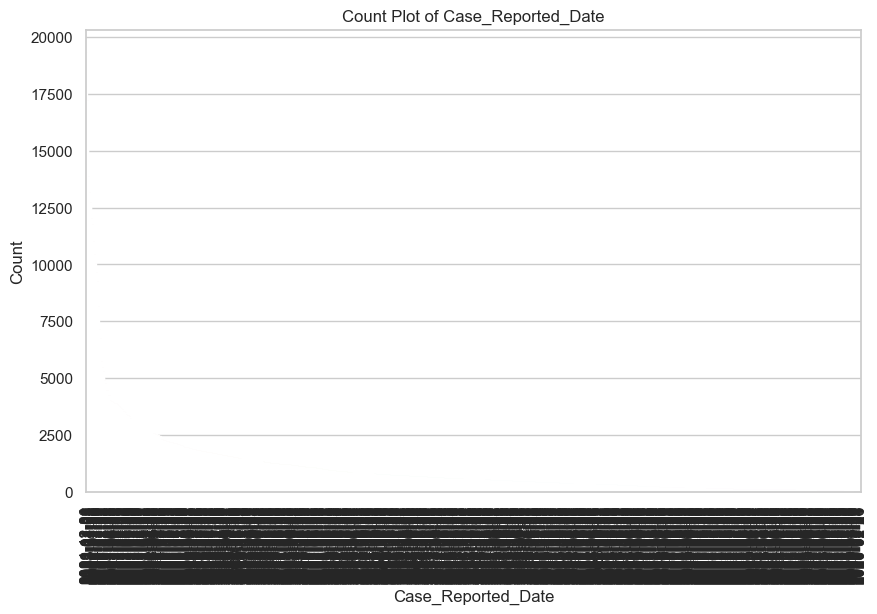

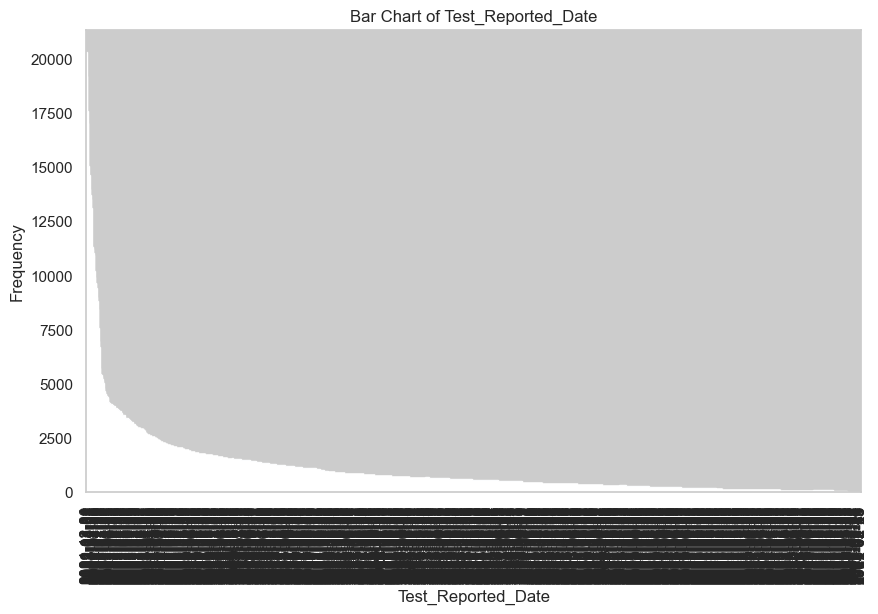

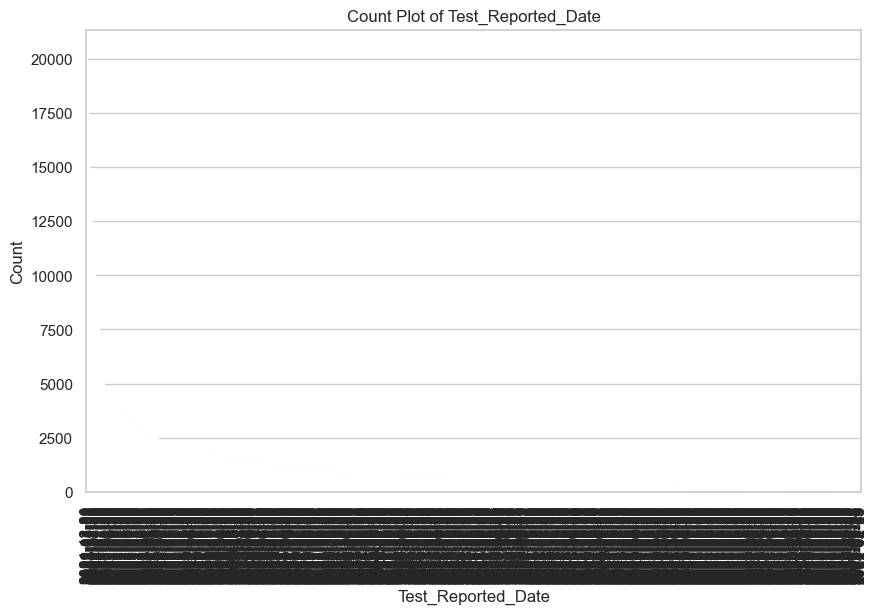

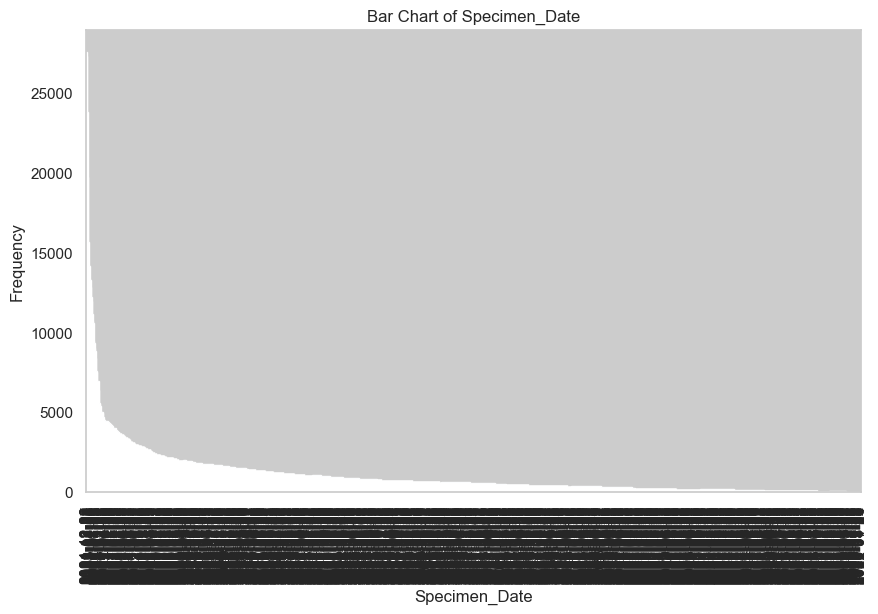

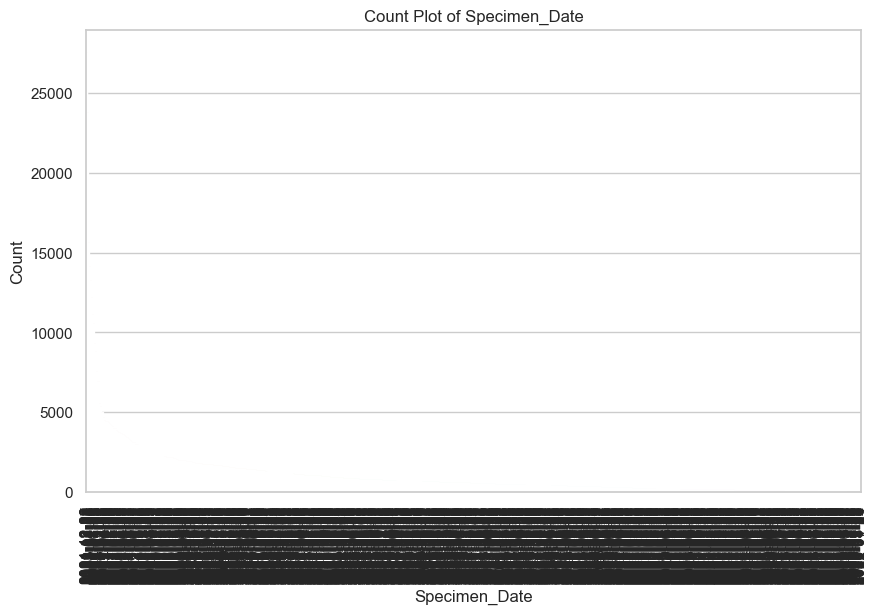

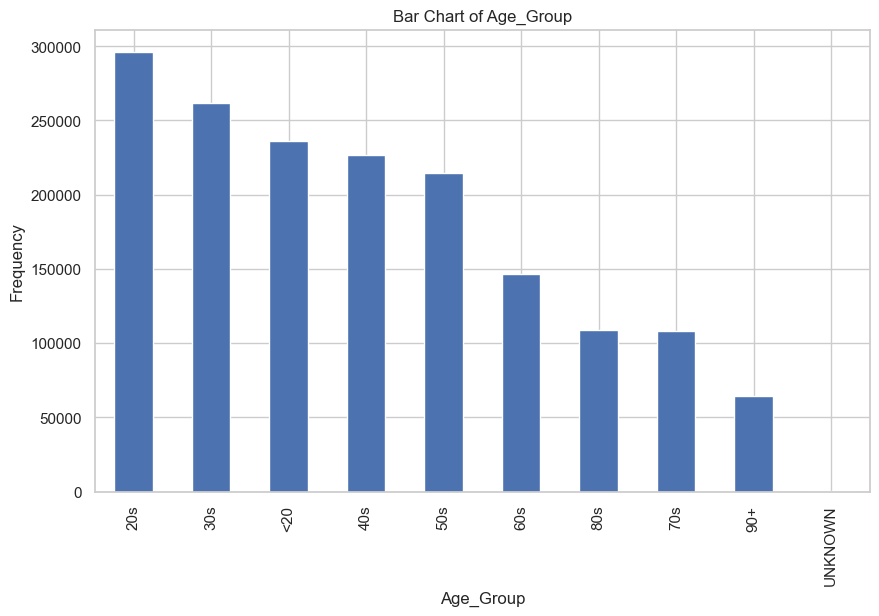

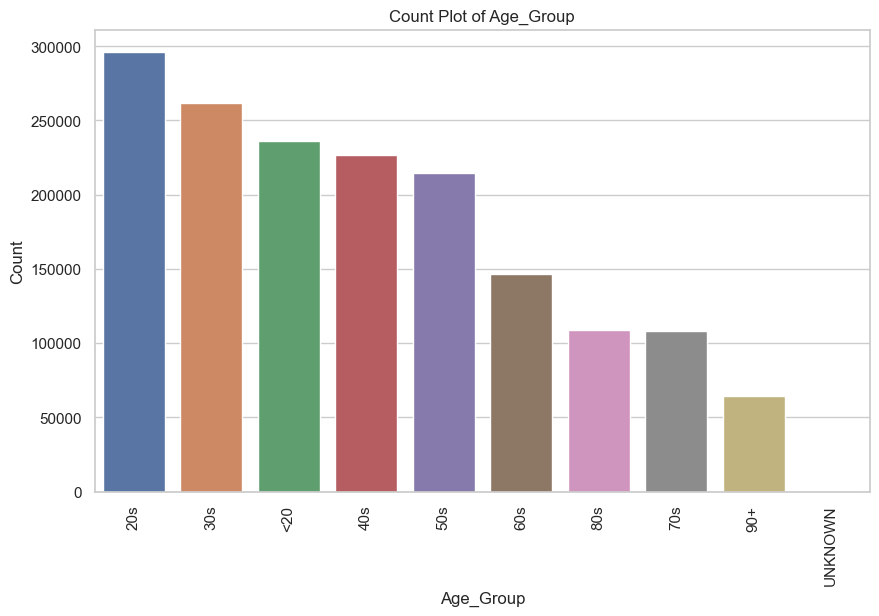

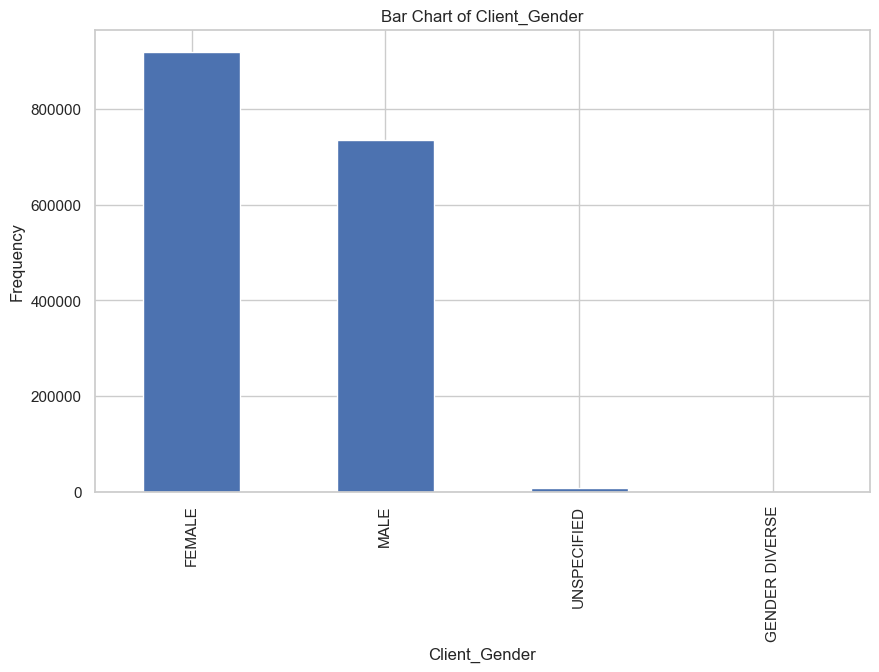

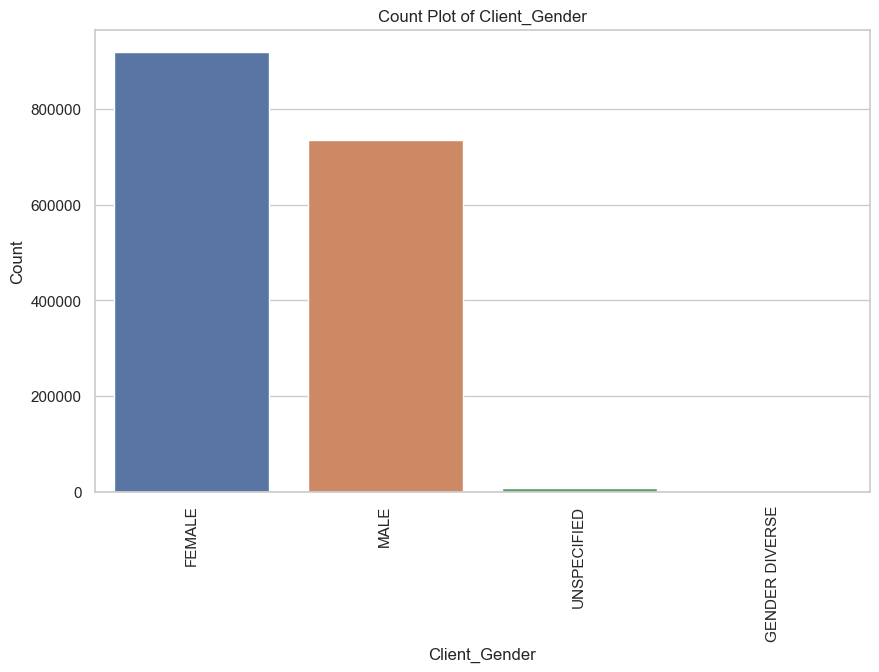

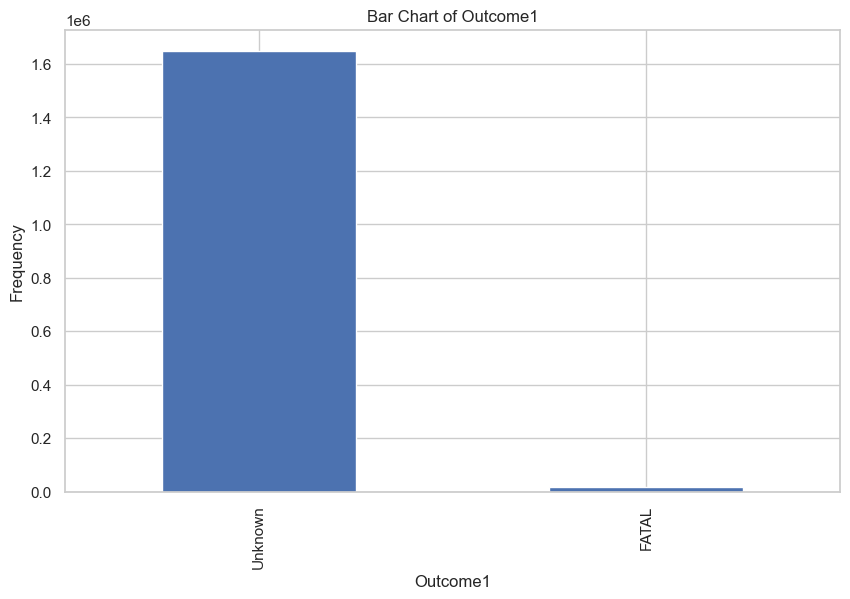

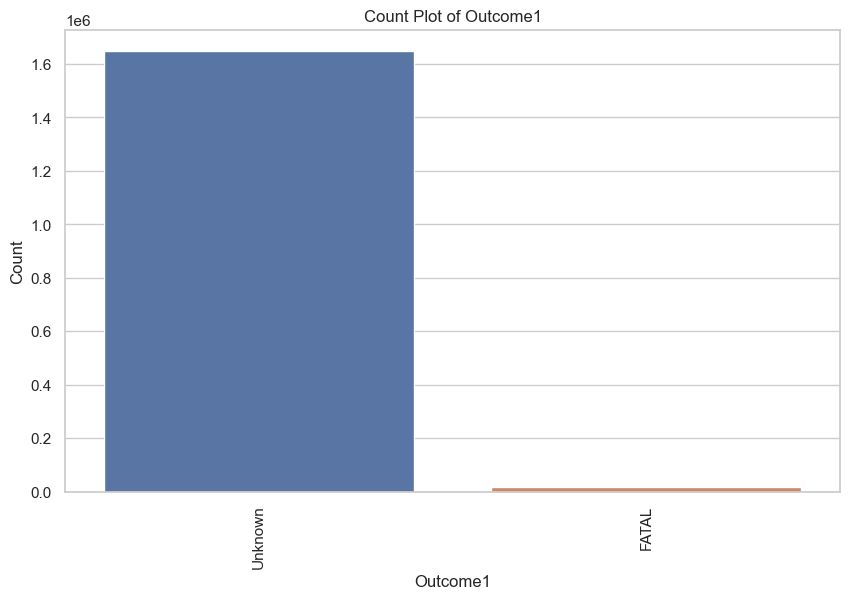

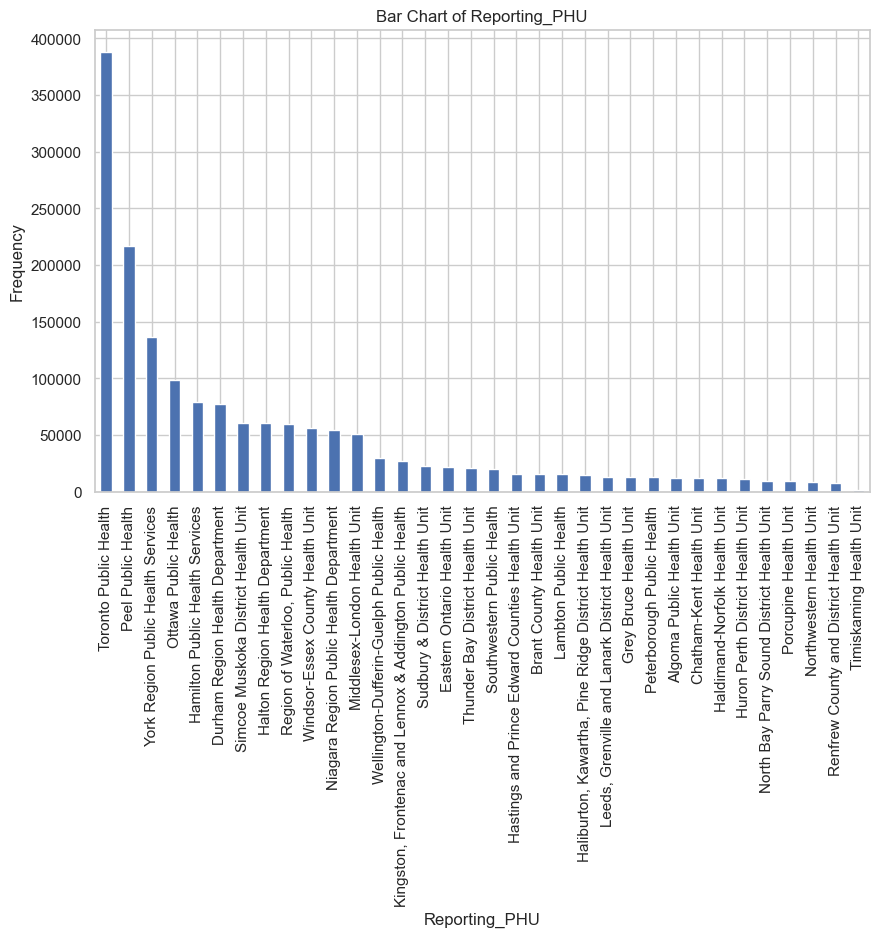

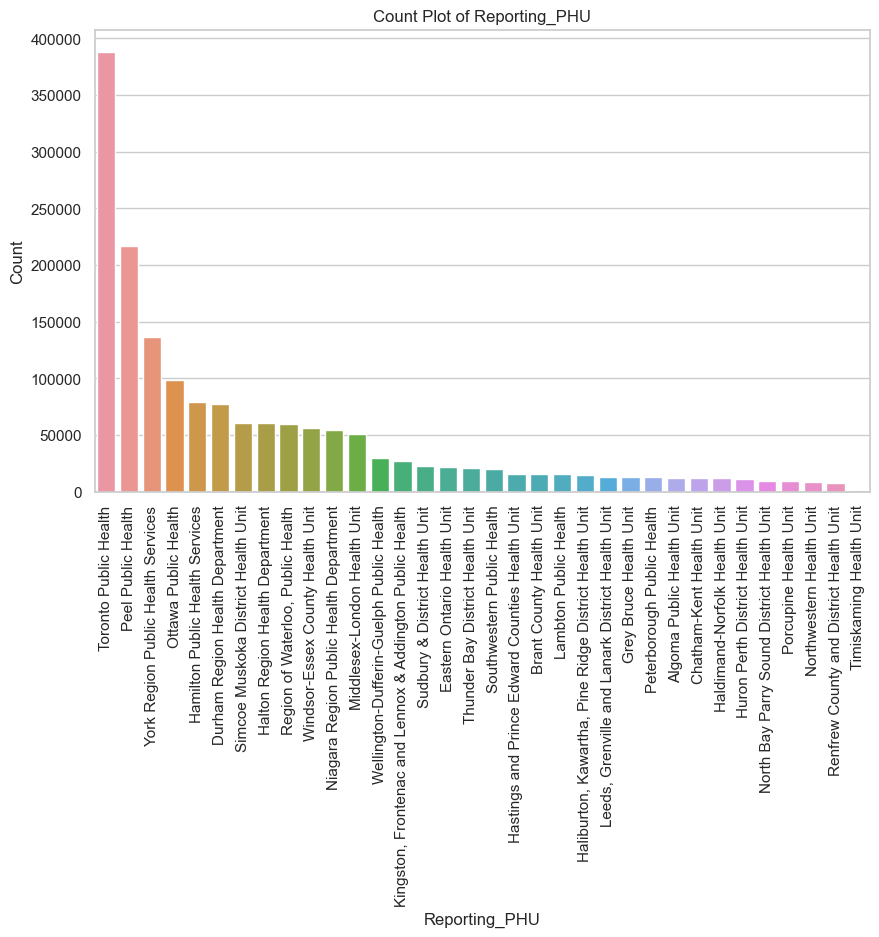

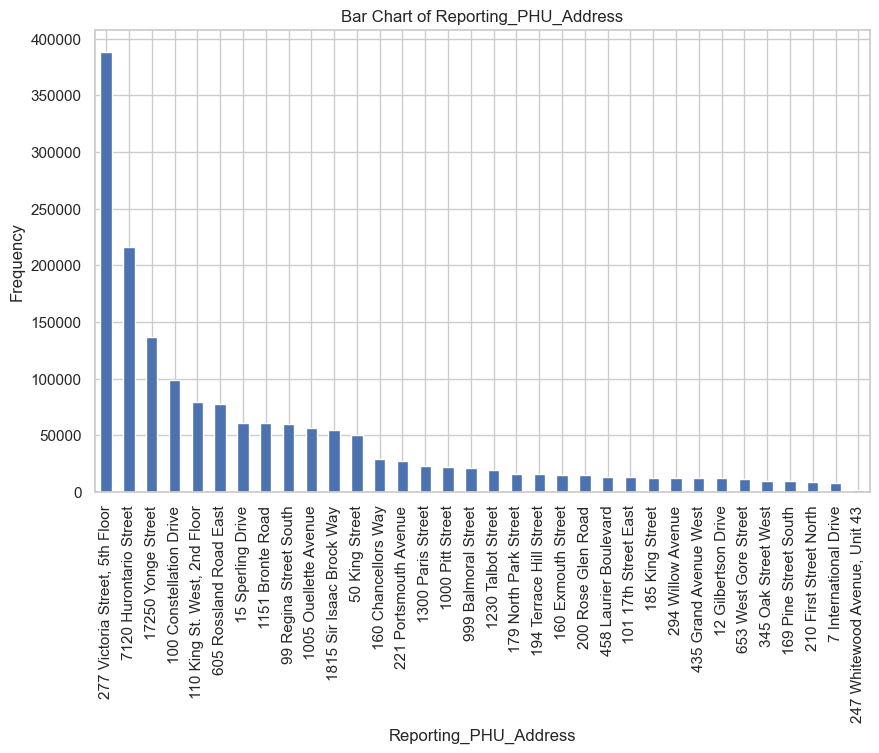

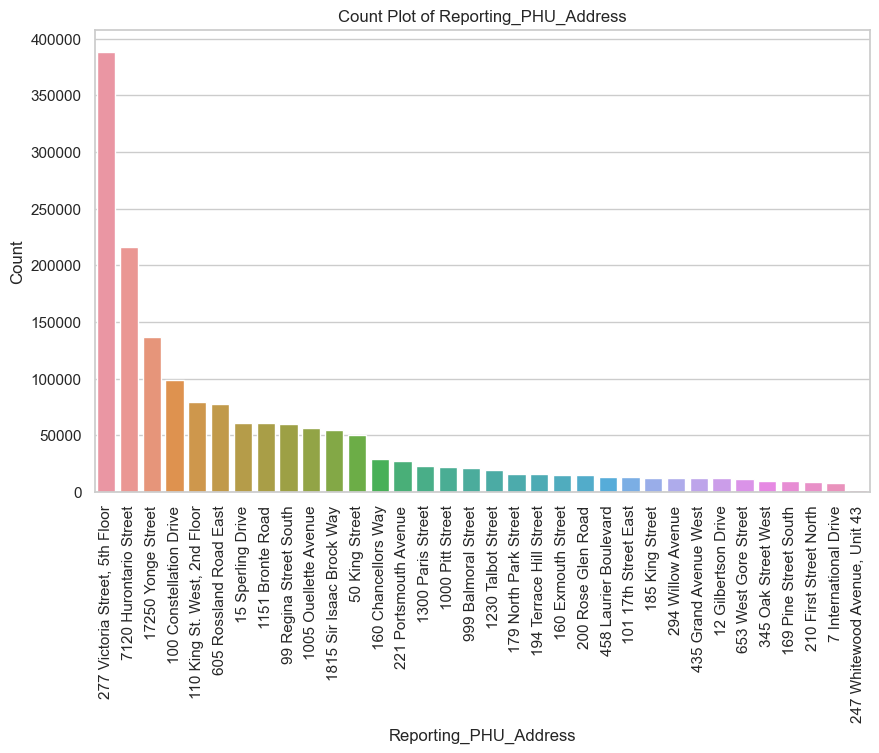

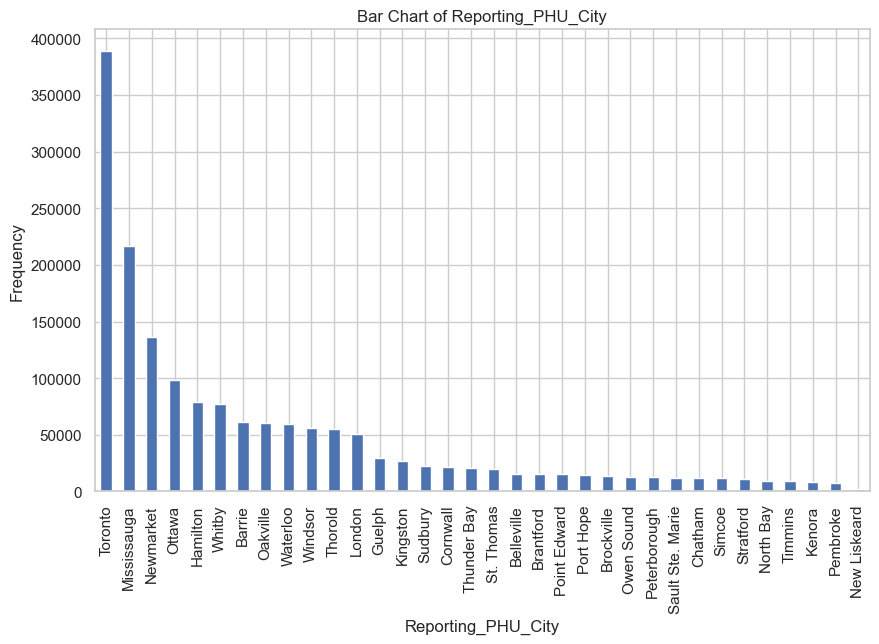

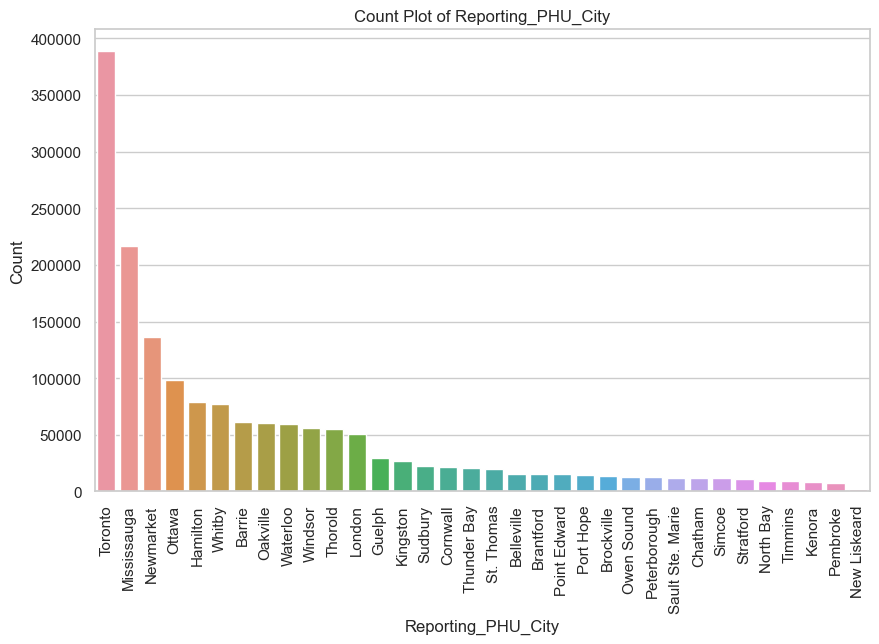

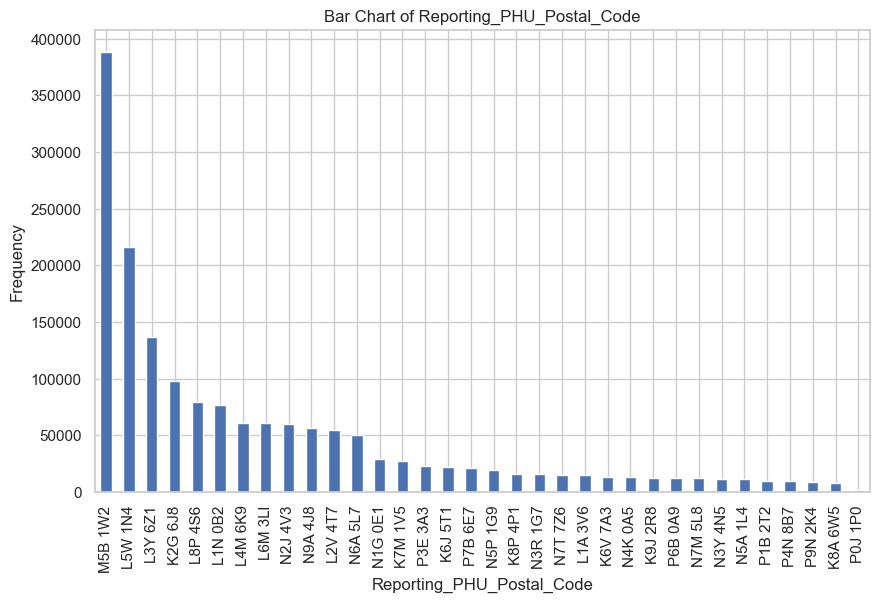

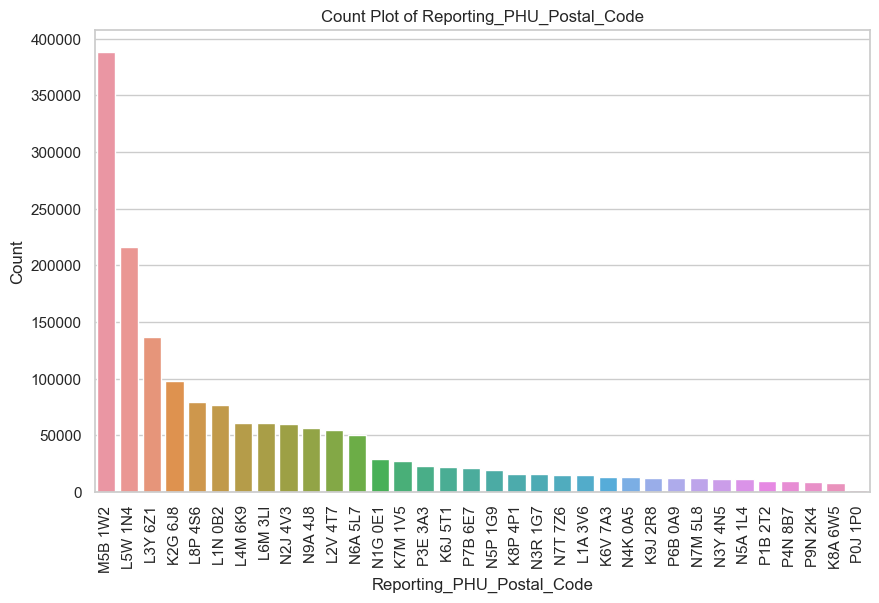

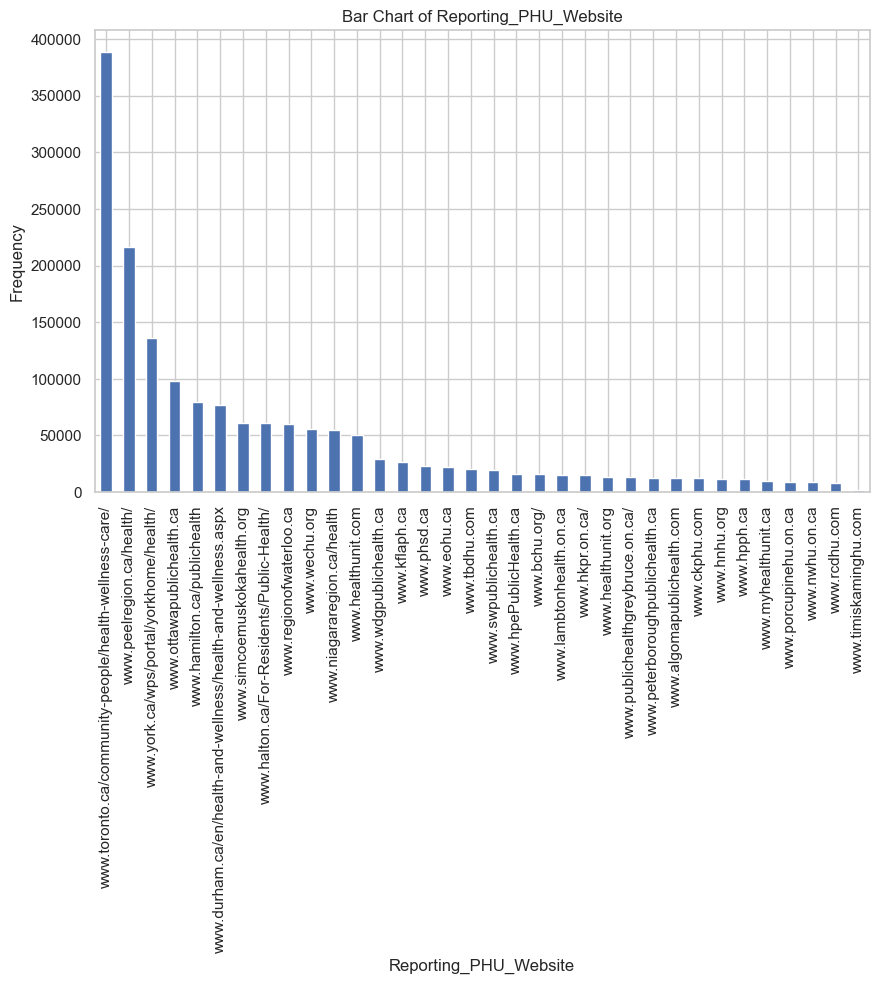

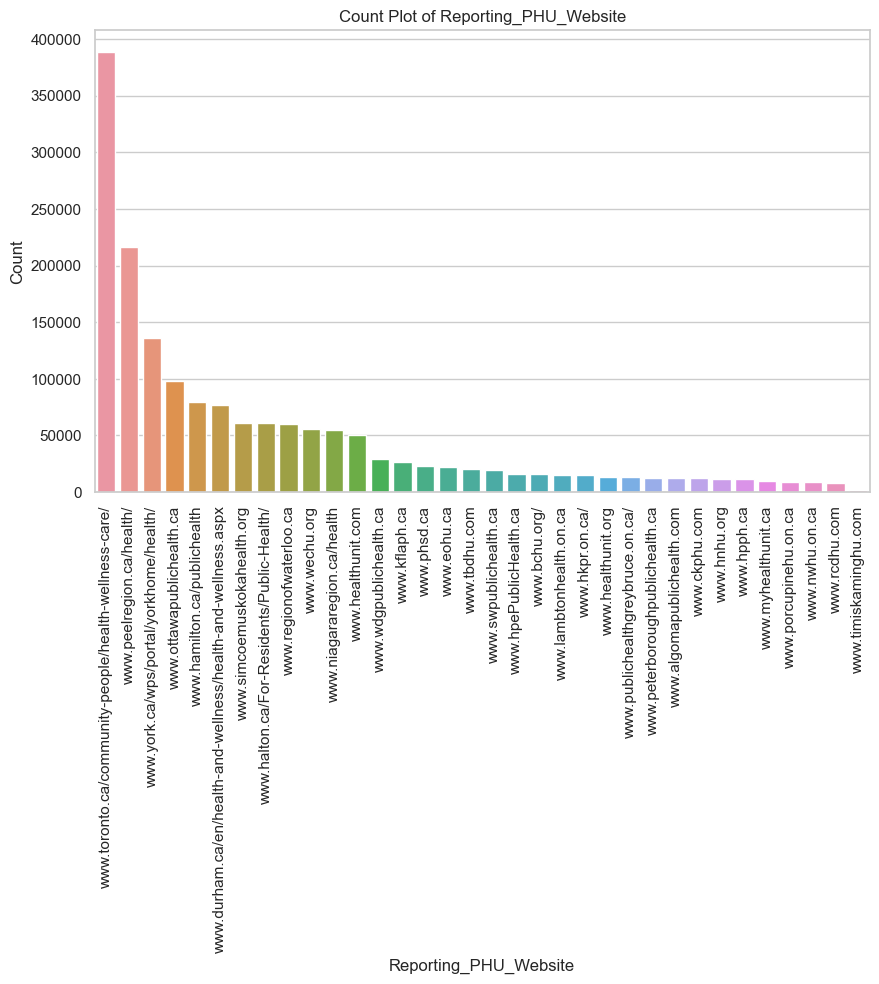

In [34]:
# bar charts and count plots for the categorical columns
for col in categorical_columns:
    # Bar chart using pandas
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    # Count plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()